# Project: No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
<ul>
    <li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
    <li>‘Neighborhood’ indicates the location of the hospital.</li>
    <li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li>Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>

### Question(s) for Analysis

<ul>
    <li>Does the gender of the patient indicates whether he will show in appointment or not?</li>
    <li>Does the age of the patient indicates whether he will show in appointment or not?</li>
    <li>Does the neighbourhood of the patient indicates whether he will show in appointment or not?</li>
    <li>Does the scholarship of the patient indicates whether he will show in appointment or not?</li>
    <li>Does the diseases like Diabetes and hipertension indicates whether he will show in appointment or not?</li>
    <li>Does receiving SMS indicates whether the patient will show in appointment or not?</li>

</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [2]:
df = pd.read_csv('noshow.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [6]:
df.drop(['PatientId', 'AppointmentID', 'AppointmentDay', 'ScheduledDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.rename(columns ={'No-show':'No_show'}, inplace =True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# assingning names to show and no show to make the recall easy
show = df.No_show =='No'
noshow = df.No_show == 'Yes'

### Research Question 1 (Does the gender of the patient indicates whether he will show in appointment or not?!)

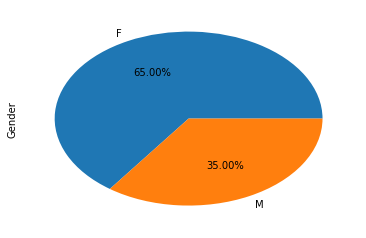

In [9]:
df['Gender'].value_counts().plot(kind='pie', autopct='%0.2f%%');

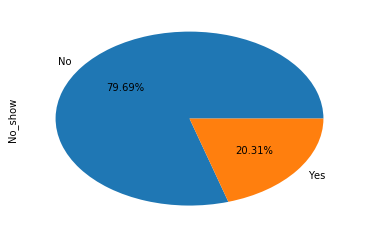

In [10]:
F = df.query('Gender == "F"')
M = df.query('Gender =="M"')
F['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

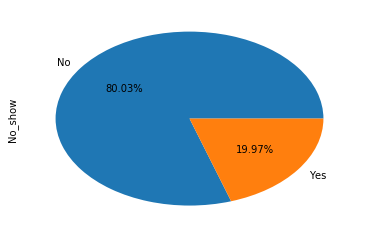

In [11]:
M['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

The gender doesn't indicate whether the pateint will attented the appointments or not because about 80 percent of both (males and females) attend the appointment

The Gender is insignificant.

### Research Question 2  (Does the age of the patient indicates whether he will show in appointment or not?!)

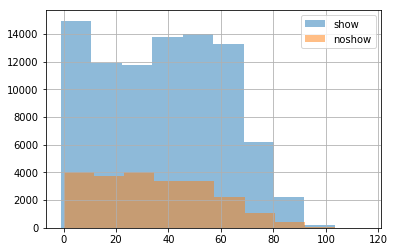

In [12]:
df.Age[show].hist(alpha = 0.5, label = 'show')
df.Age[noshow].hist(alpha = 0.5, label = 'noshow')
plt.legend();

<ul>
    <li> Patients in the ages from 0 to 10 showed more than others then ages from 35 to 70</li>
    <li> The older the pateints get, the less they attend an appointments</li>
</ul>

Age levels:
<ul>
    <li> level_one : from 0 to 10</li>
    <li> level_two : from 10 to 35</li>
    <li> level_three : from 35 to 55</li>
    <li> level_four : from 55 to 70</li>
    <li> level_five : from 70 to 80</li>
    <li> level_six : greater than 80</li>
</ul>

In [13]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 10, 35, 55, 70, 80, 115] # Fill in this list with five values you just found

In [14]:
# Labels for the four acidity level groups
bin_names = ['level_one', 'level_two', 'level_three', 'level_four', 'level_five', 'level_six'] # Name each age level category

In [15]:
# Creates age_levels column
df['age_levels'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,age_levels
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,level_four
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,level_four
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,level_four
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,level_one
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,level_four


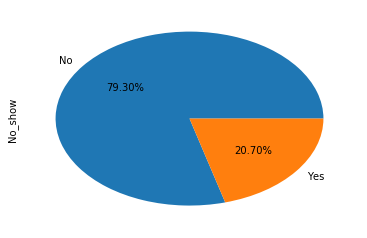

In [16]:
level_one = df.query('age_levels == "level_one"')
level_one['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

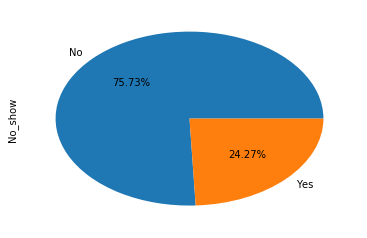

In [17]:
level_two = df.query('age_levels == "level_two"')
level_two['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

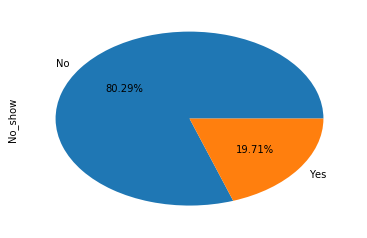

In [18]:
level_three = df.query('age_levels == "level_three"')
level_three['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

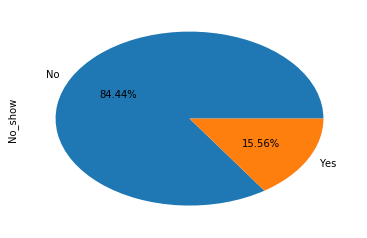

In [19]:
level_four = df.query('age_levels == "level_four"')
level_four['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

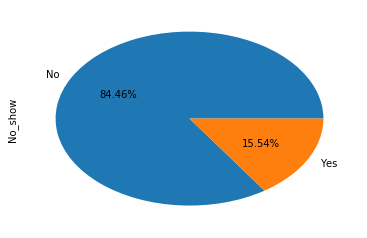

In [20]:
level_five = df.query('age_levels == "level_five"')
level_five['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

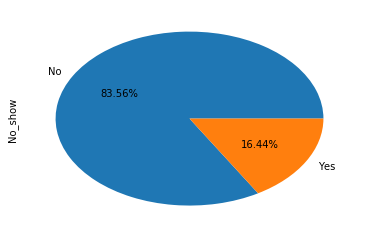

In [21]:
level_six = df.query('age_levels == "level_six"')
level_six['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

<ul>
    <li> ages level_one and level_three tends to show in an appointment by approximately 80%</li>
    <li> ages level_two tends to show in an appointment by approximately 75% which is the lowest percentage</li>
    <li> ages level_four and level_five and level_six tends to show in an appointment by approximately 84% which is the highest percentage</li>
</ul>

### Research Question 3  (Does the neighbourhood of the patient indicates whether he will show in appointment or not?!)

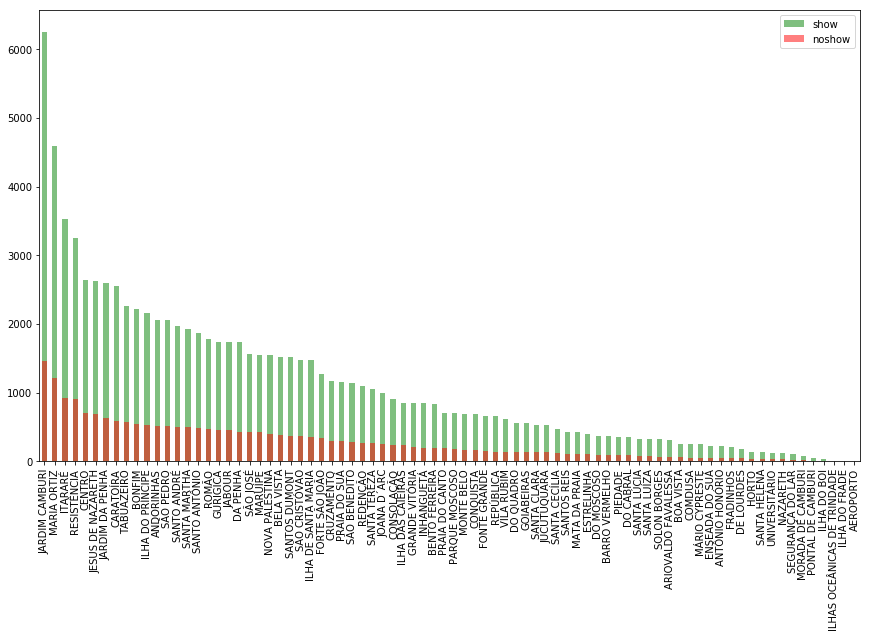

In [22]:
plt.figure(figsize=[14.7,8.3])
df.Neighbourhood[show].value_counts().plot(kind='bar', alpha = 0.5, label = 'show', color='green')
df.Neighbourhood[noshow].value_counts().plot(kind='bar', alpha = 0.5, label = 'noshow', color ='red')
plt.legend();

it is clear that neibourhood is strongly affecting the showing of patients at the clinc

### Research Question 4  (Does the scholarship of the patient indicates whether he will show in appointment or not?!)

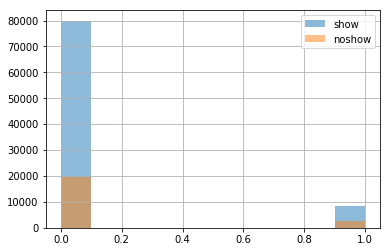

In [23]:
df.Scholarship[show].hist(alpha=0.5, label='show')
df.Scholarship[noshow].hist(alpha=0.5, label='noshow')
plt.legend();

it is clear that patients who has scholarship are few

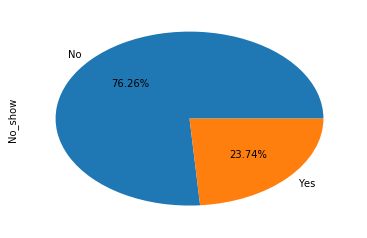

In [24]:
scholarship = df.query('Scholarship ==1')
scholarship['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

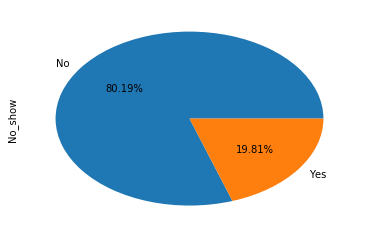

In [25]:
noscholarship = df.query('Scholarship ==0')
noscholarship['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

the difference between the two pie charts is very small

The scholarship is insignificant.

### Research Question 5  (Does the diseases like Diabetes and hipertension indicates whether he will show in appointment or not?!)

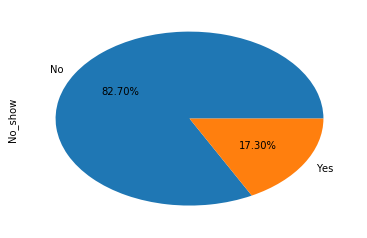

In [26]:
hipertension = df.query('Hipertension ==1')
hipertension['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

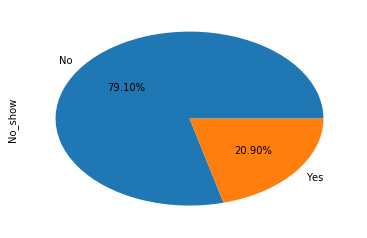

In [27]:
nohipertension = df.query('Hipertension ==0')
nohipertension['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

the difference between the two pie charts is very small

The hipertension is insignificant.

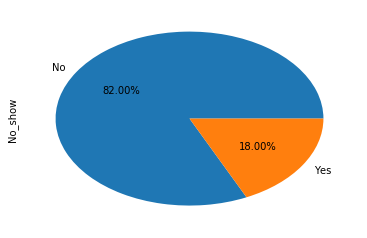

In [28]:
diabetes = df.query('Diabetes == 1')
diabetes['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

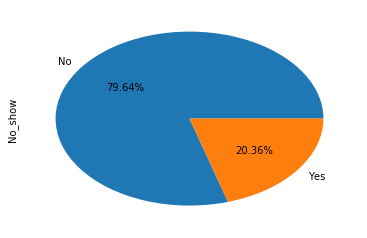

In [29]:
nodiabetes = df.query('Diabetes == 0')
nodiabetes['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

the difference between the two pie charts is very small

The diabetes is insignificant.

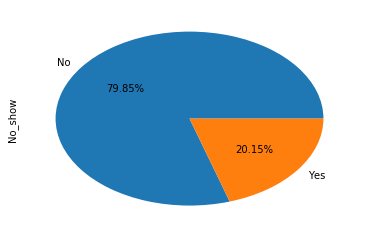

In [30]:
alcoholism = df.query('Alcoholism ==1')
alcoholism['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

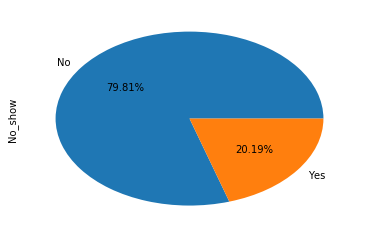

In [31]:
noalcoholism = df.query('Alcoholism ==0')
noalcoholism['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

the difference between the two pie charts is very small

The alcoholism is insignificant.

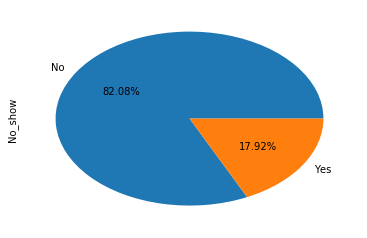

In [32]:
handcap = df.query('Handcap ==1')
handcap['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

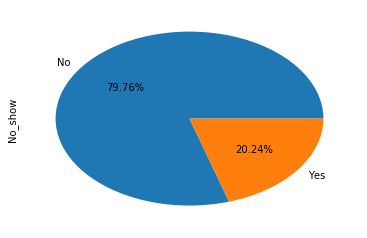

In [33]:
nohandcap = df.query('Handcap ==0')
nohandcap['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

the difference between the two pie charts is very small

The handcap is insignificant.

### Research Question 6  (Does receiving SMS indicates whether the patient will show in appointment or not?!)

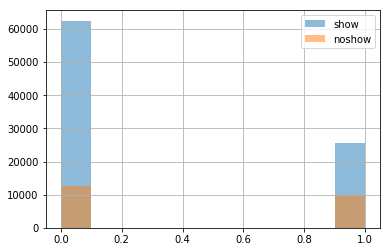

In [34]:
df.SMS_received[show].hist(alpha=0.5, label='show')
df.SMS_received[noshow].hist(alpha=0.5, label='noshow')
plt.legend();

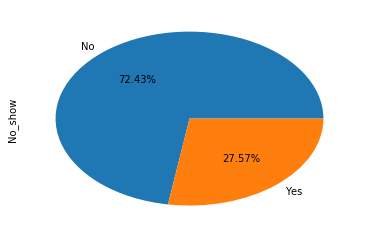

In [35]:
sms = df.query('SMS_received ==1')
sms['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

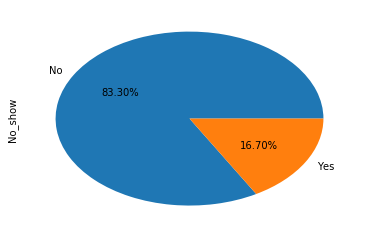

In [36]:
nosms = df.query('SMS_received ==0')
nosms['No_show'].value_counts().plot(kind='pie', autopct='%0.2f%%');

the difference between the two pie charts is approximately 10%, so the pateints who received SMS tend to show in an appointment more than pateints didn't by 10%

it is a strange this too see that more people whom do not receive SMS showed up

The SMS_received is significant.

<a id='conclusions'></a>
## Conclusions

<ul>
    <li>we can see that neighbourhood is strongly related to the patient showing up</li>
    <li>we can see that ages from 0 to 10 and 35 to 70 were the most show up</li>
    <li>there is more people showed without rceiving an SMS which is strange a little bit</li>
</ul>
there is no corrolation between gender, chronic diseases, disabilities and patients showing

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0